In [1]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 448 kB 43.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
okt = Okt()
import matplotlib.font_manager as fm
import re
from PIL import Image
from io import BytesIO 
import datetime
from collections import Counter

In [3]:
labels = ['place','date','messenger','category','type','due','summary','name','phone','email','detail','receive','address','end','period','address_detail','result','result_detail','sign','etc']
data_jmp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sounds/sounds_place_jcamp.csv', names = labels, encoding='cp949')
data_jmp.head()

,place,date,messenger,category,type,due,summary,name,phone,email,detail,receive,address,end,period,address_detail,result,result_detail,sign,etc
NaN,place,date,messenger,category,type,due,summary,name,phone,email,detail,receive,address,end,period,address_detail,result,result_detail,sign,etc
502.0,전월산캠핑장,2021-02-16,시민의소리,운영체계,건의,14,전월산 캠핑장 예약 방법관련,이영선,010-2506-2032,--,전월산이던 합강이던 현재 예약 시스템이 변경되었으면 좋겠습니다.\r\n\r\n현재 ...,성우현,전월산캠핑장,2021-02-26,8,안녕하세요?\r\n먼저 전월산국민여가캠핑장 이용에 불편을 드려서 진심으로 죄송하다는...,조치완료(진행),--,O,--
462.0,전월산캠핑장,2020-11-10,시민의소리,시설/환경,건의,14,전월산 캠핑장 팩박을 수 없게 한 부분에 대해 건의 드립니다.,노은선,010-5101-5881,--,전월산 오토캠핑장을 주말에 이용했는데 사이트 주변이 주차장처럼 콘크리트로 처리가 되...,모해리,전월산캠핑장,2020-11-12,2,안녕하세요? 전월산국민여가캠핑장 관리사무소입니다. 먼저 전월산국민여가캠핑장 이용 시...,조치완료(진행),--,O,--
289.0,전월산캠핑장,2019-09-28,시민의소리,운영체계,건의,14,캠핑장로그인이 되지않네요???!!,이동원,010-3317-1791,--,사이트에서 캠핑장을 이용할려고 회원가입하고 로그인을하였는데\r\n계속 수영장만 나오...,김종일,전월산캠핑장,2019-10-08,6,안녕하십니까? \r\n전월산 캠핑장 예약과 관련하여 답변드리겠습니다. \r\n먼저...,조치완료(진행),--,O,--
279.0,전월산캠핑장,2019-09-04,시민의소리,고객서비스,질의,14,전월산 캠핑장 이용은 어떻게 하나요?,연제민,010-6429-3713,--,전월산 캠핑장에 대해 공단 홈페이지에 시설안내도 있고 요금안내도 있는데\r\n\r\...,김종일,전월산캠핑장,2019-09-06,2,안녕하십니까? \r\n전월산 캠핑장 예약과 관련하여 답변드리겠습니다. \r\n현재 ...,조치완료(진행),--,O,--


In [4]:
circle_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/circle_img.jpg'))

In [5]:
jmp_detail = data_jmp['detail']
jmp_d_tolist = jmp_detail.values.tolist()
jmp_d_list = ''
for i in jmp_d_tolist:
  jmp_d_list += i
jmp_d_nouns = okt.nouns(jmp_d_list)
jmp_d_n = ''
for i in jmp_d_nouns:
  jmp_d_n += i+' '
jmp_d_nouns_count = Counter(jmp_d_nouns)
stopwords = set(STOPWORDS)
stopwords.update(['캠핑장','월산'])

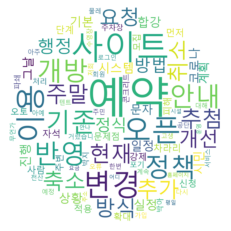

In [8]:
wd_jmp_d = WordCloud(max_font_size=200,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jmp_d_n)
fig = plt.figure()
plt.imshow(wd_jmp_d, interpolation='bilinear')
plt.axis('off')
wd_jmp_d.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jmp_d.jpg')

In [9]:
jmp_question = data_jmp[data_jmp['type'] == "질의"]
jmp_question_detail = jmp_question['detail']

jmp_check = data_jmp[data_jmp['type'] == "확인"]
jmp_check_detail = jmp_check['detail']

jmp_request = data_jmp[data_jmp['type'] == "건의"]
jmp_request_detail = jmp_request['detail']

질의

In [10]:
jmp_qd_tolist = jmp_question_detail.values.tolist()
jmp_qd_list = ''
for i in jmp_qd_tolist:
  jmp_qd_list += i

In [11]:
jmp_qd_nouns = okt.nouns(jmp_qd_list)
jmp_qd_n = ''
for i in jmp_qd_nouns:
  jmp_qd_n += i+' '

In [12]:
jmp_qd_nouns_count = Counter(jmp_qd_nouns)
jmp_qd_nouns_count

Counter({'공단': 1,
         '대해': 1,
         '방법': 2,
         '사이트': 1,
         '시설': 1,
         '안나': 1,
         '안내': 2,
         '어디': 1,
         '예약': 2,
         '오픈': 2,
         '요금': 1,
         '운영': 1,
         '월산': 3,
         '위': 1,
         '이용': 1,
         '정식': 2,
         '주소': 1,
         '캠핑장': 3,
         '평일': 1,
         '홈페이지': 1})

In [13]:
stopwords = set(STOPWORDS)
stopwords.update(['캠핑장','월산'])

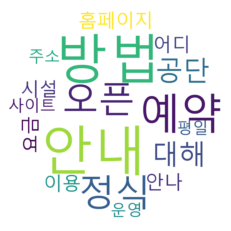

In [14]:
wd_jmp_qd = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jmp_qd_n)
fig = plt.figure()
plt.imshow(wd_jmp_qd, interpolation='bilinear')
plt.axis('off')
wd_jmp_qd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jmp_qd.jpg')

확인(=0)

In [ ]:
jmp_cd_tolist = jmp_check_detail.values.tolist()
jmp_cd_list = ''
for i in jmp_cd_tolist:
  jmp_cd_list += i

In [ ]:
jmp_cd_nouns = okt.nouns(jmp_cd_list)
jmp_cd_n = ''
for i in jmp_cd_nouns:
  jmp_cd_n += i+' '

In [ ]:
jmp_cd_nouns_count = Counter(jmp_cd_nouns)
jmp_cd_nouns_count

Counter()

In [ ]:
stopwords = set(STOPWORDS)
# stopwords.update(['모집', '임대', '아파트', '행복'])

In [ ]:
wd_jmp_cd = WordCloud(max_font_size=300,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jmp_cd_n)
fig = plt.figure()
plt.imshow(wd_jmp_cd, interpolation='bilinear')
plt.axis('off')
wd_jmp_cd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jmp_cd.jpg')

건의

In [ ]:
jmp_rd_tolist = jmp_request_detail.values.tolist()
jmp_rd_list = ''
for i in jmp_rd_tolist:
  jmp_rd_list += i

In [ ]:
jmp_rd_nouns = okt.nouns(jmp_rd_list)
jmp_rd_n = ''
for i in jmp_rd_nouns:
  jmp_rd_n += i+' '

In [ ]:
jmp_rd_nouns_count = Counter(jmp_rd_nouns)
jmp_rd_nouns_count

Counter({'가입': 1,
         '강제': 1,
         '개방': 3,
         '개선': 2,
         '거렸습니': 1,
         '것': 2,
         '계속': 1,
         '계획': 1,
         '고생': 1,
         '그날': 1,
         '기본': 1,
         '기존': 3,
         '다시': 1,
         '단계': 1,
         '뒤': 1,
         '등': 1,
         '로': 2,
         '로그인': 1,
         '만': 1,
         '먼저': 1,
         '모집': 1,
         '무언가': 1,
         '문자': 1,
         '문제점': 1,
         '물레': 1,
         '박아': 1,
         '박지': 1,
         '반영': 3,
         '방식': 2,
         '변경': 4,
         '사람': 1,
         '사이트': 4,
         '상황': 1,
         '서비스': 1,
         '석': 1,
         '션': 1,
         '수영장': 1,
         '시': 1,
         '시민': 1,
         '시스템': 1,
         '식': 1,
         '신청': 1,
         '실정': 1,
         '아예': 1,
         '아주': 1,
         '안': 2,
         '안내': 1,
         '예약': 7,
         '예정': 1,
         '오류': 1,
         '오토': 1,
         '오픈': 2,
         '요청': 2,
         '월산': 2,
         '이용': 3,
         '일

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['주차장','조치원'])

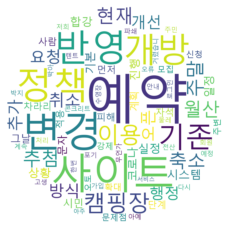

In [ ]:
wd_jmp_rd = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(jmp_rd_n)
fig = plt.figure()
plt.imshow(wd_jmp_rd, interpolation='bilinear')
plt.axis('off')
wd_jmp_rd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_jmp_rd.jpg')